In [1]:
import requests

In [23]:
import re

In [2]:
#!py -m pip install -U pypdfium2

In [3]:
#!py -m pip install -U scikit-learn

In [4]:
import pypdfium2 as pdfium

In [5]:
pdf = pdfium.PdfDocument('rgx_text_bd1_mn-2.pdf')
version = pdf.get_version()  # get the PDF standard version
n_pages = len(pdf)  # get the number of pages in the document
page = pdf[0]  # load a page

In [6]:
page

<PdfPage uuid:f66070b3>

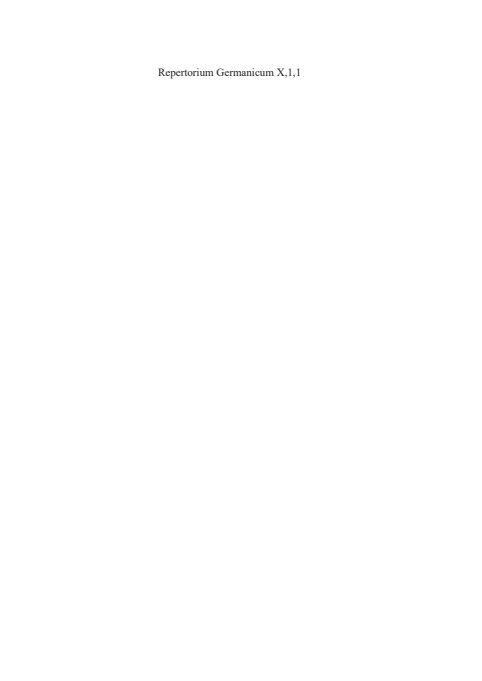

In [7]:
page.render(
    scale = 1,    # 72dpi resolution
    rotation = 0, # no additional rotation
    # ... further rendering options
).to_pil()

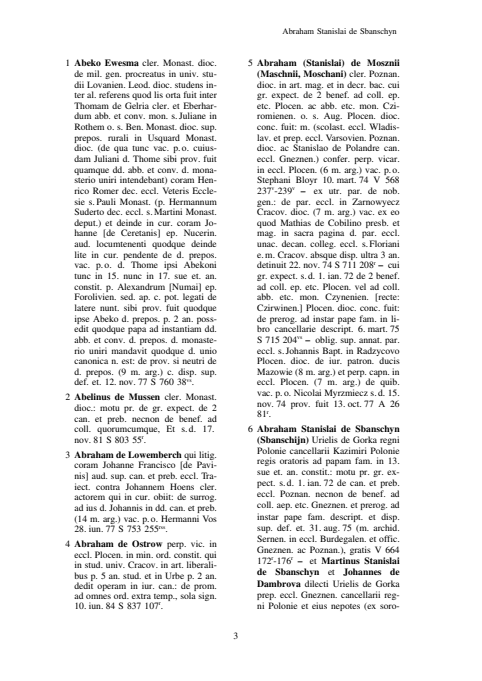

In [8]:
pdf[100].render(
    scale = 1,    # 72dpi resolution
    rotation = 0, # no additional rotation
    # ... further rendering options
).to_pil()

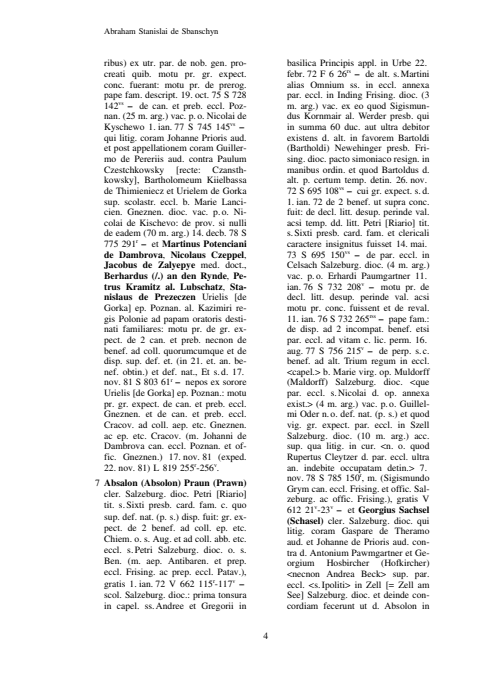

In [9]:
pdf[101].render(
    scale = 1,    # 72dpi resolution
    rotation = 0, # no additional rotation
    # ... further rendering options
).to_pil()

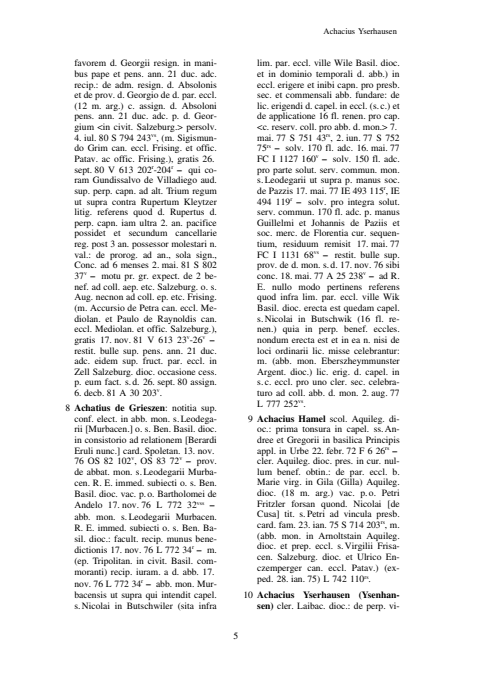

In [10]:
pdf[102].render(
    scale = 1,    # 72dpi resolution
    rotation = 0, # no additional rotation
    # ... further rendering options
).to_pil()

# Reading the data

In [29]:
len(data)

712

In [30]:
data[0]

'1 Abeko Ewesma cler. Monast. dioc.\r\nde mil. gen. procreatus in univ. stu\x02dii Lovanien. Leod. dioc. studens in\x02ter al. referens quod lis orta fuit inter\r\nThomam de Gelria cler. et Eberhar\x02dum abb. et conv. mon. s. Juliane in\r\nRothem o. s. Ben. Monast. dioc. sup.\r\nprepos. rurali in Usquard Monast.\r\ndioc. (de qua tunc vac. p. o. cuius\x02dam Juliani d. Thome sibi prov. fuit\r\nquamque dd. abb. et conv. d. mona\x02sterio uniri intendebant) coram Hen\x02rico Romer dec. eccl. Veteris Eccle\x02sie s. Pauli Monast. (p. Hermannum\r\nSuderto dec. eccl. s. Martini Monast.\r\ndeput.) et deinde in cur. coram Jo\x02hanne [de Ceretanis] ep. Nucerin.\r\naud. locumtenenti quodque deinde\r\nlite in cur. pendente de d. prepos.\r\nvac. p. o. d. Thome ipsi Abekoni\r\ntunc in 15. nunc in 17. sue et. an.\r\nconstit. p. Alexandrum [Numai] ep.\r\nForolivien. sed. ap. c. pot. legati de\r\nlatere nunt. sibi prov. fuit quodque\r\nipse Abeko d. prepos. p. 2 an. poss\x02edit quodque papa ad inst

In [31]:
data[0].split('\r\n')

['1 Abeko Ewesma cler. Monast. dioc.',
 'de mil. gen. procreatus in univ. stu\x02dii Lovanien. Leod. dioc. studens in\x02ter al. referens quod lis orta fuit inter',
 'Thomam de Gelria cler. et Eberhar\x02dum abb. et conv. mon. s. Juliane in',
 'Rothem o. s. Ben. Monast. dioc. sup.',
 'prepos. rurali in Usquard Monast.',
 'dioc. (de qua tunc vac. p. o. cuius\x02dam Juliani d. Thome sibi prov. fuit',
 'quamque dd. abb. et conv. d. mona\x02sterio uniri intendebant) coram Hen\x02rico Romer dec. eccl. Veteris Eccle\x02sie s. Pauli Monast. (p. Hermannum',
 'Suderto dec. eccl. s. Martini Monast.',
 'deput.) et deinde in cur. coram Jo\x02hanne [de Ceretanis] ep. Nucerin.',
 'aud. locumtenenti quodque deinde',
 'lite in cur. pendente de d. prepos.',
 'vac. p. o. d. Thome ipsi Abekoni',
 'tunc in 15. nunc in 17. sue et. an.',
 'constit. p. Alexandrum [Numai] ep.',
 'Forolivien. sed. ap. c. pot. legati de',
 'latere nunt. sibi prov. fuit quodque',
 'ipse Abeko d. prepos. p. 2 an. poss\x02edit quo

In [40]:
textpage = pdf[100].get_textpage()

In [42]:
pdf[100].get_size()

(481.93658447265625, 680.3626098632812)

In [49]:
left, bottom, right, top = pdf[100].get_bbox()
left, bottom, right, top

(20.97640037536621, 20.97640037536621, 502.9129943847656, 701.3389892578125)

In [47]:
pdf[101].get_bbox()

(20.97640037536621, 20.97640037536621, 502.9129943847656, 701.3389892578125)

In [58]:
textpage = pdf[100].get_textpage()
all_text = textpage.get_text_bounded(left=left, bottom=bottom, right=right, top=top)

print(len(all_text))
all_text

3763


'1 Abeko Ewesma cler. Monast. dioc.\r\nde mil. gen. procreatus in univ. stu\x02dii Lovanien. Leod. dioc. studens in\x02ter al. referens quod lis orta fuit inter\r\nThomam de Gelria cler. et Eberhar\x02dum abb. et conv. mon. s. Juliane in\r\nRothem o. s. Ben. Monast. dioc. sup.\r\nprepos. rurali in Usquard Monast.\r\ndioc. (de qua tunc vac. p. o. cuius\x02dam Juliani d. Thome sibi prov. fuit\r\nquamque dd. abb. et conv. d. mona\x02sterio uniri intendebant) coram Hen\x02rico Romer dec. eccl. Veteris Eccle\x02sie s. Pauli Monast. (p. Hermannum\r\nSuderto dec. eccl. s. Martini Monast.\r\ndeput.) et deinde in cur. coram Jo\x02hanne [de Ceretanis] ep. Nucerin.\r\naud. locumtenenti quodque deinde\r\nlite in cur. pendente de d. prepos.\r\nvac. p. o. d. Thome ipsi Abekoni\r\ntunc in 15. nunc in 17. sue et. an.\r\nconstit. p. Alexandrum [Numai] ep.\r\nForolivien. sed. ap. c. pot. legati de\r\nlatere nunt. sibi prov. fuit quodque\r\nipse Abeko d. prepos. p. 2 an. poss\x02edit quodque papa ad inst

In [60]:
textpage = pdf[100].get_textpage()
white_padding = 40
all_text = textpage.get_text_bounded(left=left, bottom=bottom + white_padding + 10, right=right, top=top - white_padding)

print(len(all_text))
all_text

3728


'1 Abeko Ewesma cler. Monast. dioc.\r\nde mil. gen. procreatus in univ. stu\x02dii Lovanien. Leod. dioc. studens in\x02ter al. referens quod lis orta fuit inter\r\nThomam de Gelria cler. et Eberhar\x02dum abb. et conv. mon. s. Juliane in\r\nRothem o. s. Ben. Monast. dioc. sup.\r\nprepos. rurali in Usquard Monast.\r\ndioc. (de qua tunc vac. p. o. cuius\x02dam Juliani d. Thome sibi prov. fuit\r\nquamque dd. abb. et conv. d. mona\x02sterio uniri intendebant) coram Hen\x02rico Romer dec. eccl. Veteris Eccle\x02sie s. Pauli Monast. (p. Hermannum\r\nSuderto dec. eccl. s. Martini Monast.\r\ndeput.) et deinde in cur. coram Jo\x02hanne [de Ceretanis] ep. Nucerin.\r\naud. locumtenenti quodque deinde\r\nlite in cur. pendente de d. prepos.\r\nvac. p. o. d. Thome ipsi Abekoni\r\ntunc in 15. nunc in 17. sue et. an.\r\nconstit. p. Alexandrum [Numai] ep.\r\nForolivien. sed. ap. c. pot. legati de\r\nlatere nunt. sibi prov. fuit quodque\r\nipse Abeko d. prepos. p. 2 an. poss\x02edit quodque papa ad inst

In [61]:
data = []
white_padding = 40
for i in range(100, len(pdf)):
    textpage = pdf[i].get_textpage()
    text_all = textpage.get_text_bounded(left=left, bottom=bottom + white_padding + 10, right=right, top=top - white_padding)
    data.append(text_all)

# regex attempt

In [62]:
data[0]

'1 Abeko Ewesma cler. Monast. dioc.\r\nde mil. gen. procreatus in univ. stu\x02dii Lovanien. Leod. dioc. studens in\x02ter al. referens quod lis orta fuit inter\r\nThomam de Gelria cler. et Eberhar\x02dum abb. et conv. mon. s. Juliane in\r\nRothem o. s. Ben. Monast. dioc. sup.\r\nprepos. rurali in Usquard Monast.\r\ndioc. (de qua tunc vac. p. o. cuius\x02dam Juliani d. Thome sibi prov. fuit\r\nquamque dd. abb. et conv. d. mona\x02sterio uniri intendebant) coram Hen\x02rico Romer dec. eccl. Veteris Eccle\x02sie s. Pauli Monast. (p. Hermannum\r\nSuderto dec. eccl. s. Martini Monast.\r\ndeput.) et deinde in cur. coram Jo\x02hanne [de Ceretanis] ep. Nucerin.\r\naud. locumtenenti quodque deinde\r\nlite in cur. pendente de d. prepos.\r\nvac. p. o. d. Thome ipsi Abekoni\r\ntunc in 15. nunc in 17. sue et. an.\r\nconstit. p. Alexandrum [Numai] ep.\r\nForolivien. sed. ap. c. pot. legati de\r\nlatere nunt. sibi prov. fuit quodque\r\nipse Abeko d. prepos. p. 2 an. poss\x02edit quodque papa ad inst

In [63]:
data[1]

'ribus) ex utr. par. de nob. gen. pro\x02creati quib. motu pr. gr. expect.\r\nconc. fuerant: motu pr. de prerog.\r\npape fam. descript. 19. oct. 75 S 728\r\n142vs – de can. et preb. eccl. Poz\x02nan. (25 m. arg.) vac. p. o. Nicolai de\r\nKyschewo 1. ian. 77 S 745 145vs –\r\nqui litig. coram Johanne Prioris aud.\r\net post appellationem coram Guiller\x02mo de Pereriis aud. contra Paulum\r\nCzestchkowsky [recte: Czansth\x02kowsky], Bartholomeum Kiielbassa\r\nde Thimieniecz et Urielem de Gorka\r\nsup. scolastr. eccl. b. Marie Lanci\x02cien. Gneznen. dioc. vac. p. o. Ni\x02colai de Kischevo: de prov. si nulli\r\nde eadem (70 m. arg.) 14. decb. 78 S\r\n775 291r – et Martinus Potenciani\r\nde Dambrova, Nicolaus Czeppel,\r\nJacobus de Zalyepye med. doct.,\r\nBerhardus (/.) an den Rynde, Pe\x02trus Kramitz al. Lubschatz, Sta\x02nislaus de Prezeczen Urielis [de\r\nGorka] ep. Poznan. al. Kazimiri re\x02gis Polonie ad papam oratoris desti\x02nati familiares: motu pr. de gr. ex\x02pect. de 2 can. 

In [74]:
entries = []

for page in data:
    pattern = r'(\r\n\d+ [a-zA-Z]{2,}.*)'
    
    result = re.split(pattern, page)
    
    # Combine the split parts with their patterns
    output = []
    output.append(result[0])
    # print(output)
    for i in range(1, len(result), 2):
        output.append(result[i].strip() + result[i + 1].strip())
    
    # Filter out any empty strings
    output = [s for s in output if s]
    print(output)
    entries.append(output)
    # Print the result
    # print(len(output))
    # for item in output:
    #     print(item)
    #     print()

['1 Abeko Ewesma cler. Monast. dioc.\r\nde mil. gen. procreatus in univ. stu\x02dii Lovanien. Leod. dioc. studens in\x02ter al. referens quod lis orta fuit inter\r\nThomam de Gelria cler. et Eberhar\x02dum abb. et conv. mon. s. Juliane in\r\nRothem o. s. Ben. Monast. dioc. sup.\r\nprepos. rurali in Usquard Monast.\r\ndioc. (de qua tunc vac. p. o. cuius\x02dam Juliani d. Thome sibi prov. fuit\r\nquamque dd. abb. et conv. d. mona\x02sterio uniri intendebant) coram Hen\x02rico Romer dec. eccl. Veteris Eccle\x02sie s. Pauli Monast. (p. Hermannum\r\nSuderto dec. eccl. s. Martini Monast.\r\ndeput.) et deinde in cur. coram Jo\x02hanne [de Ceretanis] ep. Nucerin.\r\naud. locumtenenti quodque deinde\r\nlite in cur. pendente de d. prepos.\r\nvac. p. o. d. Thome ipsi Abekoni\r\ntunc in 15. nunc in 17. sue et. an.\r\nconstit. p. Alexandrum [Numai] ep.\r\nForolivien. sed. ap. c. pot. legati de\r\nlatere nunt. sibi prov. fuit quodque\r\nipse Abeko d. prepos. p. 2 an. poss\x02edit quodque papa ad ins

In [167]:
# Initialize variables
pattern = r'^(?:\d+ [A-Z][a-z]+|\d+ \[[A-Za-z]+\.?(?: [A-Za-z]+\.?)*\] [A-Za-z]+|\d+ \([A-Z][a-z]+\) [A-Za-z]+)'

previous_number = None
entries = []

current_segment = []
output = []
for data_i, text in enumerate(data):
    print(f"new page with previous_number {previous_number}")
    # Split the text into lines for processing
    lines = text.splitlines(keepends=True)
    
    # Iterate through the lines to find segments
    for line in lines:
        # Check if the line starts with a number followed by a space
        if re.match(pattern, line):
            if current_segment:
                # Join and check the previous segment before starting a new one
                segment_text = ''.join(current_segment).strip()
                current_number = int(line.split()[0])
                
                if previous_number is None or current_number == previous_number + 1:
                    previous_number = current_number
                else:
                    print(f"=============================Warning: Found a non-sequential number {current_number} after {previous_number}")
                    print(data_i, line)
                    # print(segment_text)
                    print(len(current_segment))
                    print('\n')
                    current_segment.append(line)  # Append non-sequential line to current segment
                    continue
            
            # Reset current segment for the new entry
            print("current_segment", current_segment)
            output.append(segment_text)
            current_segment = [line]
        else:
            current_segment.append(line)
    
    # Don't forget to add the last segment if exists
    if current_segment:
        segment_text = ''.join(current_segment).strip()
        current_number = int(segment_text.split()[0])
        
        if previous_number is None or current_number == previous_number + 1:
            output.append(segment_text)
            print('#'*10)
            print("segment_text", segment_text)
        else:
            print(f"########## Warning: Found a non-sequential number {current_number} after {previous_number}")
        # print("last current_segment", current_segment)
    entries.append(output)
    # Print the result
    # for item in output:
    #     print(item)
    #     print()

new page with previous_number None
current_segment []
current_segment ['1 Abeko Ewesma cler. Monast. dioc.\r\n', 'de mil. gen. procreatus in univ. stu\x02dii Lovanien. Leod. dioc. studens in\x02ter al. referens quod lis orta fuit inter\r\n', 'Thomam de Gelria cler. et Eberhar\x02dum abb. et conv. mon. s. Juliane in\r\n', 'Rothem o. s. Ben. Monast. dioc. sup.\r\n', 'prepos. rurali in Usquard Monast.\r\n', 'dioc. (de qua tunc vac. p. o. cuius\x02dam Juliani d. Thome sibi prov. fuit\r\n', 'quamque dd. abb. et conv. d. mona\x02sterio uniri intendebant) coram Hen\x02rico Romer dec. eccl. Veteris Eccle\x02sie s. Pauli Monast. (p. Hermannum\r\n', 'Suderto dec. eccl. s. Martini Monast.\r\n', 'deput.) et deinde in cur. coram Jo\x02hanne [de Ceretanis] ep. Nucerin.\r\n', 'aud. locumtenenti quodque deinde\r\n', 'lite in cur. pendente de d. prepos.\r\n', 'vac. p. o. d. Thome ipsi Abekoni\r\n', 'tunc in 15. nunc in 17. sue et. an.\r\n', 'constit. p. Alexandrum [Numai] ep.\r\n', 'Forolivien. sed. ap

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [133]:
data[17]

'60 Admont\r\nAbb. et conv. mon. s. Blasii in Ad\x02mont o. s. Ben. Salzeburg. dioc. refe\x02rentes quod Ernestus Praucker laic.\r\nnonnullas decimas et bona ad d.\r\nmon. spectantes usurpat: de committ.\r\nin cur., Conc. in partibus 10. mart.\r\n75 S 715 195v\r\n.\r\n61 Adolphus de Bibera ex utr. par. de\r\nnob. seu mil. gen. dec. eccl. s. Bur\x02kardi e. m. Herbip.: de disp. ut unac.\r\nd. decan. (10 m. arg.) aliud incom\x02pat. benef. recip. val. etsi 2 par. eccl.\r\n31. decb. 77 S 762 263vs.\r\n62 Adolffus de Buetbach (Breytbach)\r\nprecept. dom. s. Johannis ord. s. Jo\x02hannis Jerusalemitani Trever.: de in\x02corp. d. preceptorie (20 m. arg.) par.\r\neccl. b. Marie ad pontem prope et\r\ne. m. Trever. d. precept. contiguam\r\n(4 m. arg.) 11. nov. 71 S 673 107vs –\r\ncommiss. Trever. [dioc.?] 80/81 I\r\n334 225r\r\n.\r\n63 Adolphus secundogenitus ducis\r\nCliven. et com. de Marchia cler.\r\nColon. dioc. in 16. sue et. an. cons\x02tit.: supplic. d. duce de prepos. eccl.\r\ns. Martin

In [138]:
text = data[17]
previous_number = 59
entries = []

current_segment = []
output = []

lines = text.splitlines(keepends=True)
# Iterate through the lines to find segments
for line in lines:
    print(line)
    # Check if the line starts with a number followed by a space
    if re.match(r'^(?:\d+ [A-Z][a-z]+|\[\d+ [A-Z][a-z]+\])', line):
        if current_segment:
            # Join and check the previous segment before starting a new one
            segment_text = ''.join(current_segment).strip()
            current_number = int(line.split()[0])

            if previous_number is None or current_number == previous_number + 1:
                previous_number = current_number
            else:
                print(f"Warning: Found a non-sequential number {current_number} after {previous_number}")
                print(data_i, line)
                # print(segment_text)
                print(len(current_segment))
                print('\n')
                current_segment.append(line)  # Append non-sequential line to current segment
                continue
        
        # Reset current segment for the new entry
        print("current_segment", current_segment)
        output.append(segment_text)
        current_segment = [line]
    else:
        current_segment.append(line)

60 Admont

current_segment []
Abb. et conv. mon. s. Blasii in Admont o. s. Ben. Salzeburg. dioc. referentes quod Ernestus Praucker laic.

nonnullas decimas et bona ad d.

mon. spectantes usurpat: de committ.

in cur., Conc. in partibus 10. mart.

75 S 715 195v

.

61 Adolphus de Bibera ex utr. par. de

380 61 Adolphus de Bibera ex utr. par. de

7


nob. seu mil. gen. dec. eccl. s. Burkardi e. m. Herbip.: de disp. ut unac.

d. decan. (10 m. arg.) aliud incompat. benef. recip. val. etsi 2 par. eccl.

31. decb. 77 S 762 263vs.

62 Adolffus de Buetbach (Breytbach)

380 62 Adolffus de Buetbach (Breytbach)

11


precept. dom. s. Johannis ord. s. Johannis Jerusalemitani Trever.: de incorp. d. preceptorie (20 m. arg.) par.

eccl. b. Marie ad pontem prope et

e. m. Trever. d. precept. contiguam

(4 m. arg.) 11. nov. 71 S 673 107vs –

commiss. Trever. [dioc.?] 80/81 I

334 225r

.

63 Adolphus secundogenitus ducis

380 63 Adolphus secundogenitus ducis

19


Cliven. et com. de Marchia cler.

In [164]:
data[599]

'tusen. o. s. Aug. qui decan. ac can. et\r\npreb. eccl. s. Albani e. m. Magunt.\r\n(de quib. vac. p. o. in cur. Sifridi\r\nNordeck prov. fuit) resign. in mani\x02bus pape et cui pens. ann. 50 fl. adc.\r\nsup. dd. decan. et can. et preb. et\r\nsup. fruct. eccl. s. Simeonis Trever.\r\np. Servatium Goswini cler. Trever.\r\ndioc. decr. doct. persolv. assign. fuit\r\net qui litig. sup. d. decan. coram Jo\x02hanne Francisco de Pavinis aud. con\x02tra d. Servatium et contra Theoderi\x02cum intrusum: decl. litt. sup. pens.\r\nperinde val. acsi pens. ann. 25 fl.\r\nsup. can. et preb. eccl. s. Florini (10\r\nm. arg.) et 20 fl. sup. capel. s. Marti\x02ni e. m. op. Andernacen. Trever. di\x02oc. (10 m. arg.) conc. foret (exec. ep.\r\nTirasonen. et ep. Ferrarien. ac offic.\r\nTrever.), gratis 16. ian. 76 V 577\r\n313r\r\n-316v – de can. et preb. eccl.\r\nAmbianen. (24 l. T. p.) vac. p. o. in\r\ncur. Innocentii Crety, Et in commen\x02dam ad vitam cum obtentis 22. iun.\r\n78 S 771 104vss – can. eccl. 

In [166]:
pattern = r'^(?:\d+ [A-Z][a-z]+|\d+ \[[A-Za-z]+\.?(?: [A-Za-z]+\.?)*\] [A-Za-z]+|\d+ \([A-Z][a-z]+\) [A-Za-z]+)'
print(re.match(pattern, '60 Admont\r\n'))
print(re.match(pattern, '61 Adolphus de Bibera ex utr. par. de\r\n'))
print(re.match(pattern, '100 [Adolphus] test case here\r\n'))
print(re.match(pattern, '283 [mon.] Sancti Andree cis Traisi\x02nam\r\n'))
print(re.match(pattern, '936 [Bertoldus de Oberg] ep. Panaden.:\r\n'))
print(re.match(pattern, '2117 (Ewaldus) Cymmerman: pro for\x02mata [solv.] 6 grossos decb. 77 T 13\r\n'))
print(re.match(pattern, '2415 [mon. et op.] Sancti Galli [1. pars 3\r\n'))

<re.Match object; span=(0, 9), match='60 Admont'>
<re.Match object; span=(0, 11), match='61 Adolphus'>
<re.Match object; span=(0, 19), match='100 [Adolphus] test'>
<re.Match object; span=(0, 17), match='283 [mon.] Sancti'>
<re.Match object; span=(0, 27), match='936 [Bertoldus de Oberg] ep'>
<re.Match object; span=(0, 24), match='2117 (Ewaldus) Cymmerman'>
<re.Match object; span=(0, 25), match='2415 [mon. et op.] Sancti'>


In [108]:
print(len(entries))

527


In [109]:
for o in entries:
    print(len(o))

266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266
266


In [111]:
entries[0] == entries[1]

True

In [75]:
len(entries)

712

In [79]:
len(entries[1])

2

In [76]:
len(entries[2])

5

In [77]:
entries[1]

['ribus) ex utr. par. de nob. gen. pro\x02creati quib. motu pr. gr. expect.\r\nconc. fuerant: motu pr. de prerog.\r\npape fam. descript. 19. oct. 75 S 728\r\n142vs – de can. et preb. eccl. Poz\x02nan. (25 m. arg.) vac. p. o. Nicolai de\r\nKyschewo 1. ian. 77 S 745 145vs –\r\nqui litig. coram Johanne Prioris aud.\r\net post appellationem coram Guiller\x02mo de Pereriis aud. contra Paulum\r\nCzestchkowsky [recte: Czansth\x02kowsky], Bartholomeum Kiielbassa\r\nde Thimieniecz et Urielem de Gorka\r\nsup. scolastr. eccl. b. Marie Lanci\x02cien. Gneznen. dioc. vac. p. o. Ni\x02colai de Kischevo: de prov. si nulli\r\nde eadem (70 m. arg.) 14. decb. 78 S\r\n775 291r – et Martinus Potenciani\r\nde Dambrova, Nicolaus Czeppel,\r\nJacobus de Zalyepye med. doct.,\r\nBerhardus (/.) an den Rynde, Pe\x02trus Kramitz al. Lubschatz, Sta\x02nislaus de Prezeczen Urielis [de\r\nGorka] ep. Poznan. al. Kazimiri re\x02gis Polonie ad papam oratoris desti\x02nati familiares: motu pr. de gr. ex\x02pect. de 2 can.

In [78]:
entries[2]

['favorem d. Georgii resign. in mani\x02bus pape et pens. ann. 21 duc. adc.\r\nrecip.: de adm. resign. d. Absolonis\r\net de prov. d. Georgio de d. par. eccl.\r\n(12 m. arg.) c. assign. d. Absoloni\r\npens. ann. 21 duc. adc. p. d. Geor\x02gium <in civit. Salzeburg.> persolv.\r\n4. iul. 80 S 794 243vs, (m. Sigismun\x02do Grim can. eccl. Frising. et offic.\r\nPatav. ac offic. Frising.), gratis 26.\r\nsept. 80 V 613 202r\r\n-204r – qui co\x02ram Gundissalvo de Villadiego aud.\r\nsup. perp. capn. ad alt. Trium regum\r\nut supra contra Rupertum Kleytzer\r\nlitig. referens quod d. Rupertus d.\r\nperp. capn. iam ultra 2. an. pacifice\r\npossidet et secundum cancellarie\r\nreg. post 3 an. possessor molestari n.\r\nval.: de prorog. ad an., sola sign.,\r\nConc. ad 6 menses 2. mai. 81 S 802\r\n37v – motu pr. gr. expect. de 2 be\x02nef. ad coll. aep. etc. Salzeburg. o. s.\r\nAug. necnon ad coll. ep. etc. Frising.\r\n(m. Accursio de Petra can. eccl. Me\x02diolan. et Paulo de Raynoldis can.\r\neccl.

# Semantic Chunking Attempt

In [14]:
from langchain_experimental.text_splitter import SemanticChunker

In [21]:
import chromadb
chroma_client = chromadb.PersistentClient(path="rg_vectordb")

In [22]:
collection = chroma_client.get_or_create_collection(name="rg_x_collection")

In [23]:
from chromadb.utils import embedding_functions
default_ef = embedding_functions.DefaultEmbeddingFunction()

In [38]:
val = default_ef("foo")
val

[[0.0503581166267395,
  0.06264623999595642,
  -0.061827365309000015,
  0.03152845799922943,
  0.03411198779940605,
  0.04731567203998566,
  0.06201803311705589,
  0.059644874185323715,
  0.021589204668998718,
  0.006887160241603851,
  0.05046543851494789,
  -0.09534928947687149,
  -0.04039912670850754,
  0.019933508709073067,
  -0.0214021485298872,
  -0.020986570045351982,
  -0.07829968631267548,
  -0.03933179751038551,
  -0.08387243002653122,
  0.0033294064924120903,
  -0.04660399258136749,
  0.005695238243788481,
  0.0009875784162431955,
  0.018057916313409805,
  -0.059670720249414444,
  0.023389611393213272,
  -0.08691268414258957,
  0.03609900176525116,
  -0.08338861912488937,
  -0.10067611187696457,
  0.0008361744694411755,
  0.1192990392446518,
  0.06871477514505386,
  0.015917077660560608,
  -0.05228118225932121,
  -0.017528345808386803,
  0.012803016230463982,
  -0.013966410420835018,
  0.04338102415204048,
  0.0045759351924061775,
  -0.1090155690908432,
  -0.07069327682256699

In [35]:
sentences = [{'sentence': x, 'index' : i} for i, x in enumerate(data[0].split('\r\n'))]
sentences[:3]

[{'sentence': '1 Abeko Ewesma cler. Monast. dioc.', 'index': 0},
 {'sentence': 'de mil. gen. procreatus in univ. stu\x02dii Lovanien. Leod. dioc. studens in\x02ter al. referens quod lis orta fuit inter',
  'index': 1},
 {'sentence': 'Thomam de Gelria cler. et Eberhar\x02dum abb. et conv. mon. s. Juliane in',
  'index': 2}]

In [36]:
def combine_sentences(sentences, buffer_size=1):
    # Go through each sentence dict
    for i in range(len(sentences)):

        # Create a string that will hold the sentences which are joined
        combined_sentence = ''

        # Add sentences before the current one, based on the buffer size.
        for j in range(i - buffer_size, i):
            # Check if the index j is not negative (to avoid index out of range like on the first one)
            if j >= 0:
                # Add the sentence at index j to the combined_sentence string
                combined_sentence += sentences[j]['sentence'] + ' '

        # Add the current sentence
        combined_sentence += sentences[i]['sentence']

        # Add sentences after the current one, based on the buffer size
        for j in range(i + 1, i + 1 + buffer_size):
            # Check if the index j is within the range of the sentences list
            if j < len(sentences):
                # Add the sentence at index j to the combined_sentence string
                combined_sentence += ' ' + sentences[j]['sentence']

        # Then add the whole thing to your dict
        # Store the combined sentence in the current sentence dict
        sentences[i]['combined_sentence'] = combined_sentence

    return sentences

sentences = combine_sentences(sentences)

In [37]:
sentences[:3]

[{'sentence': '1 Abeko Ewesma cler. Monast. dioc.',
  'index': 0,
  'combined_sentence': '1 Abeko Ewesma cler. Monast. dioc. de mil. gen. procreatus in univ. stu\x02dii Lovanien. Leod. dioc. studens in\x02ter al. referens quod lis orta fuit inter'},
 {'sentence': 'de mil. gen. procreatus in univ. stu\x02dii Lovanien. Leod. dioc. studens in\x02ter al. referens quod lis orta fuit inter',
  'index': 1,
  'combined_sentence': '1 Abeko Ewesma cler. Monast. dioc. de mil. gen. procreatus in univ. stu\x02dii Lovanien. Leod. dioc. studens in\x02ter al. referens quod lis orta fuit inter Thomam de Gelria cler. et Eberhar\x02dum abb. et conv. mon. s. Juliane in'},
 {'sentence': 'Thomam de Gelria cler. et Eberhar\x02dum abb. et conv. mon. s. Juliane in',
  'index': 2,
  'combined_sentence': 'de mil. gen. procreatus in univ. stu\x02dii Lovanien. Leod. dioc. studens in\x02ter al. referens quod lis orta fuit inter Thomam de Gelria cler. et Eberhar\x02dum abb. et conv. mon. s. Juliane in Rothem o. s. B

In [39]:
embeddings = default_ef([x['combined_sentence'] for x in sentences])

In [40]:
for i, sentence in enumerate(sentences):
    sentence['combined_sentence_embedding'] = embeddings[i]

In [41]:
sentence

{'sentence': 'prep. eccl. Gneznen. cancellarii reg\x02ni Polonie et eius nepotes (ex soro-',
 'index': 90,
 'combined_sentence': 'Dambrova dilecti Urielis de Gorka prep. eccl. Gneznen. cancellarii reg\x02ni Polonie et eius nepotes (ex soro-',
 'combined_sentence_embedding': [-0.05574823170900345,
  0.15960291028022766,
  -0.05336272716522217,
  -0.04253670945763588,
  -0.15593725442886353,
  0.017487119883298874,
  0.007487216033041477,
  0.03258059173822403,
  0.044702839106321335,
  0.04338592290878296,
  0.08403133600950241,
  -0.04498789459466934,
  -0.026931701228022575,
  -0.058074261993169785,
  -0.09262774139642715,
  -0.027710778638720512,
  -0.0756414532661438,
  0.08396363258361816,
  -0.03865562751889229,
  -0.002656476804986596,
  0.009786156937479973,
  -0.043534111231565475,
  0.017506178468465805,
  0.043101780116558075,
  -0.06574638932943344,
  0.009346836246550083,
  0.025948425754904747,
  -0.029088910669088364,
  -0.0007481059874407947,
  -0.01519983634352684,
  0.

In [46]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_distances(sentences):
    distances = []
    for i in range(len(sentences) - 1):
        embedding_current = sentences[i]['combined_sentence_embedding']
        embedding_next = sentences[i + 1]['combined_sentence_embedding']
        
        # Calculate cosine similarity
        similarity = cosine_similarity([embedding_current], [embedding_next])[0][0]
        
        # Convert to cosine distance
        distance = 1 - similarity

        # Append cosine distance to the list
        distances.append(distance)

        # Store distance in the dictionary
        sentences[i]['distance_to_next'] = distance

    # Optionally handle the last sentence
    # sentences[-1]['distance_to_next'] = None  # or a default value

    return distances, sentences

In [47]:
distances, sentences = calculate_cosine_distances(sentences)

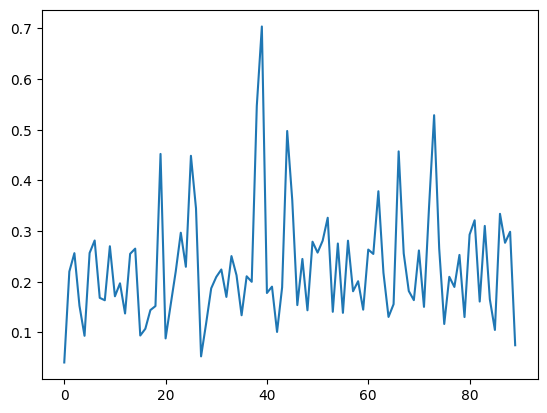

In [48]:
import matplotlib.pyplot as plt

plt.plot(distances);

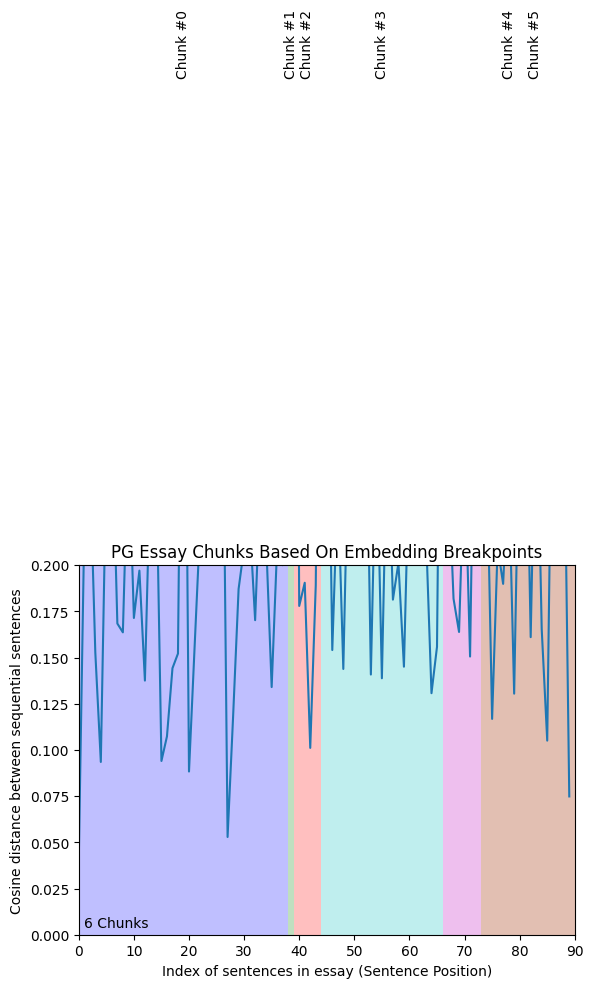

In [49]:
import numpy as np

plt.plot(distances);

y_upper_bound = .2
plt.ylim(0, y_upper_bound)
plt.xlim(0, len(distances))

# We need to get the distance threshold that we'll consider an outlier
# We'll use numpy .percentile() for this
breakpoint_percentile_threshold = 95
breakpoint_distance_threshold = np.percentile(distances, breakpoint_percentile_threshold) # If you want more chunks, lower the percentile cutoff
plt.axhline(y=breakpoint_distance_threshold, color='r', linestyle='-');

# Then we'll see how many distances are actually above this one
num_distances_above_theshold = len([x for x in distances if x > breakpoint_distance_threshold]) # The amount of distances above your threshold
plt.text(x=(len(distances)*.01), y=y_upper_bound/50, s=f"{num_distances_above_theshold + 1} Chunks");

# Then we'll get the index of the distances that are above the threshold. This will tell us where we should split our text
indices_above_thresh = [i for i, x in enumerate(distances) if x > breakpoint_distance_threshold] # The indices of those breakpoints on your list

# Start of the shading and text
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, breakpoint_index in enumerate(indices_above_thresh):
    start_index = 0 if i == 0 else indices_above_thresh[i - 1]
    end_index = breakpoint_index if i < len(indices_above_thresh) - 1 else len(distances)

    plt.axvspan(start_index, end_index, facecolor=colors[i % len(colors)], alpha=0.25)
    plt.text(x=np.average([start_index, end_index]),
             y=breakpoint_distance_threshold + (y_upper_bound)/ 20,
             s=f"Chunk #{i}", horizontalalignment='center',
             rotation='vertical')

# # Additional step to shade from the last breakpoint to the end of the dataset
if indices_above_thresh:
    last_breakpoint = indices_above_thresh[-1]
    if last_breakpoint < len(distances):
        plt.axvspan(last_breakpoint, len(distances), facecolor=colors[len(indices_above_thresh) % len(colors)], alpha=0.25)
        plt.text(x=np.average([last_breakpoint, len(distances)]),
                 y=breakpoint_distance_threshold + (y_upper_bound)/ 20,
                 s=f"Chunk #{i+1}",
                 rotation='vertical')

plt.title("PG Essay Chunks Based On Embedding Breakpoints")
plt.xlabel("Index of sentences in essay (Sentence Position)")
plt.ylabel("Cosine distance between sequential sentences")
plt.show()

In [50]:
# Initialize the start index
start_index = 0

# Create a list to hold the grouped sentences
chunks = []

# Iterate through the breakpoints to slice the sentences
for index in indices_above_thresh:
    # The end index is the current breakpoint
    end_index = index

    # Slice the sentence_dicts from the current start index to the end index
    group = sentences[start_index:end_index + 1]
    combined_text = ' '.join([d['sentence'] for d in group])
    chunks.append(combined_text)
    
    # Update the start index for the next group
    start_index = index + 1

# The last group, if any sentences remain
if start_index < len(sentences):
    combined_text = ' '.join([d['sentence'] for d in sentences[start_index:]])
    chunks.append(combined_text)

# grouped_sentences now contains the chunked sentences

In [53]:
for i, chunk in enumerate(chunks):
    buffer = 2000
    
    print (f"Chunk #{i}")
    print (chunk[:buffer].strip())
    print ("...")
    print (chunk[-buffer:].strip())
    print ("\n")

Chunk #0
1 Abeko Ewesma cler. Monast. dioc. de mil. gen. procreatus in univ. studii Lovanien. Leod. dioc. studens inter al. referens quod lis orta fuit inter Thomam de Gelria cler. et Eberhardum abb. et conv. mon. s. Juliane in Rothem o. s. Ben. Monast. dioc. sup. prepos. rurali in Usquard Monast. dioc. (de qua tunc vac. p. o. cuiusdam Juliani d. Thome sibi prov. fuit quamque dd. abb. et conv. d. monasterio uniri intendebant) coram Henrico Romer dec. eccl. Veteris Ecclesie s. Pauli Monast. (p. Hermannum Suderto dec. eccl. s. Martini Monast. deput.) et deinde in cur. coram Johanne [de Ceretanis] ep. Nucerin. aud. locumtenenti quodque deinde lite in cur. pendente de d. prepos. vac. p. o. d. Thome ipsi Abekoni tunc in 15. nunc in 17. sue et. an. constit. p. Alexandrum [Numai] ep. Forolivien. sed. ap. c. pot. legati de latere nunt. sibi prov. fuit quodque ipse Abeko d. prepos. p. 2 an. possedit quodque papa ad instantiam dd. abb. et conv. d. prepos. d. monasterio uniri mandavit q